# Convergence and the CFL Condition

What happens when we change the number of points in our grid?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def linearconv(num_x):
    dx = 2 / (num_x - 1)
    num_t = 20
    len_t = 0.5
    dt = len_t / num_t
    c = 1
    
    u = np.ones(num_x)
    u[int(0.5/dx):int(1/dx+1)] = 2
    
    un = np.ones(num_x)
    
    for n in range(num_t):
        un = u.copy()
        for i in range(1, num_x):
            u[i] = un[i] - c*dt/dx*(un[i] - un[i-1])
            
    plt.plot(np.linspace(0, 2, num_x), u);

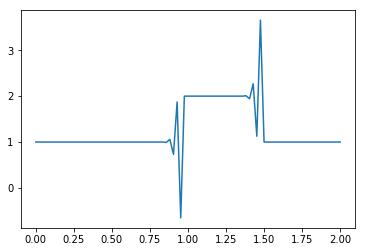

In [10]:
linearconv(85)

As we increase the grid size, there is a point where too much resolution is too much. When we increase the resolution, it becomes clear that there's something bad that's happened. 

Over the period of time $\Delta t$, the wave travels a distance greater than $dx$. Stability can be enforced if the $\Delta t$ step size is calculated w.r.t the size of $dx$ 

$$\sigma = \frac{u\Delta T}{\Delta x} \leq \sigma_{max}$$
 
*u* is the speed of the wave, $\sigma$ is the **Courant Number**. The value, $\sigma_{max}$ is dependent on the discretization. 

In [12]:
# New code that uses sigma as a parameter

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def linearconv(num_x):
    dx = 2 / (num_x - 1)
    num_t = 20
    len_t = 0.5
    c = 1
    sigma = 0.5
    dt = sigma * dx
    
    u = np.ones(num_x)
    u[int(0.5/dx):int(1/dx+1)] = 2
    
    un = np.ones(num_x)
    
    for n in range(num_t):
        un = u.copy()
        for i in range(1, num_x):
            u[i] = un[i] - c*dt/dx*(un[i] - un[i-1])
            
    plt.plot(np.linspace(0, 2, num_x), u);

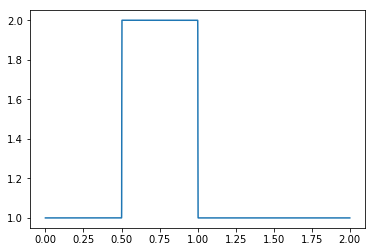

In [17]:
linearconv(10000)